In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
##Load data
from sklearn.datasets import load_iris
input_data = load_iris()
X = input_data.data
feature_names = input_data.feature_names

#print(X) # sepal.length, sepal.width, petal.length, petal.width

In [3]:
import pandas as pd
df = pd.DataFrame(X, columns = input_data.feature_names)
df.head()
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


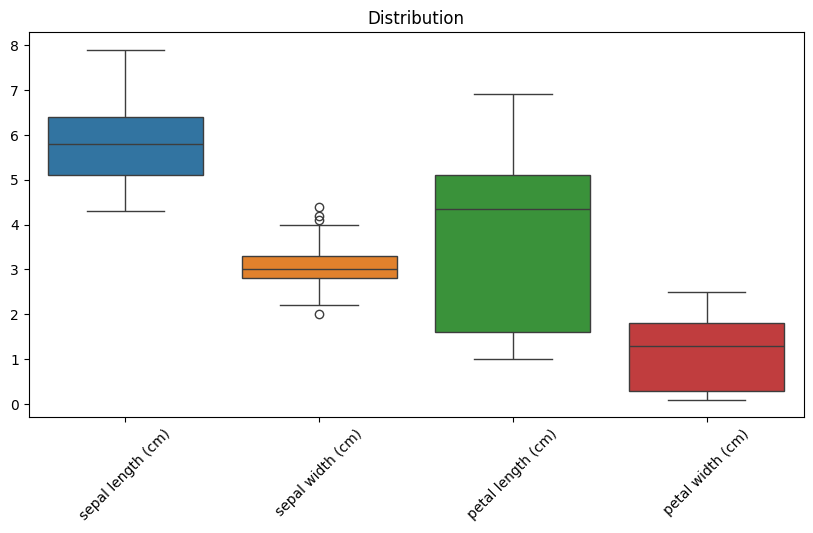

In [4]:
## Boxplot
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title("Distribution")
plt.xticks(rotation=45)
plt.show()


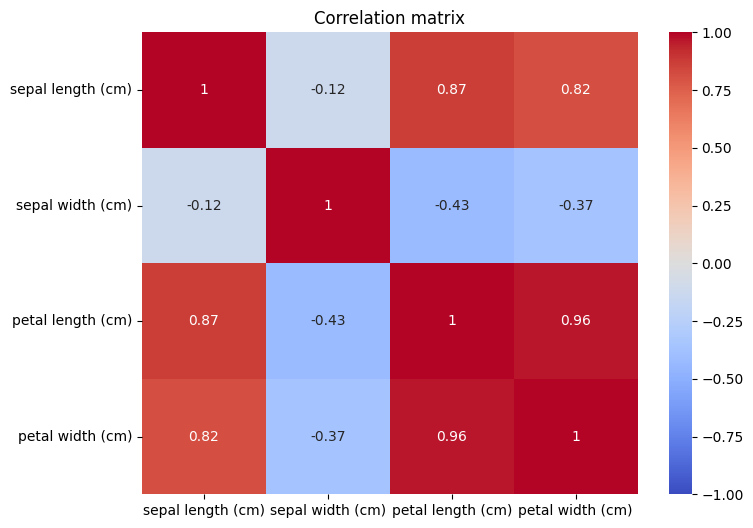

In [5]:
## Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

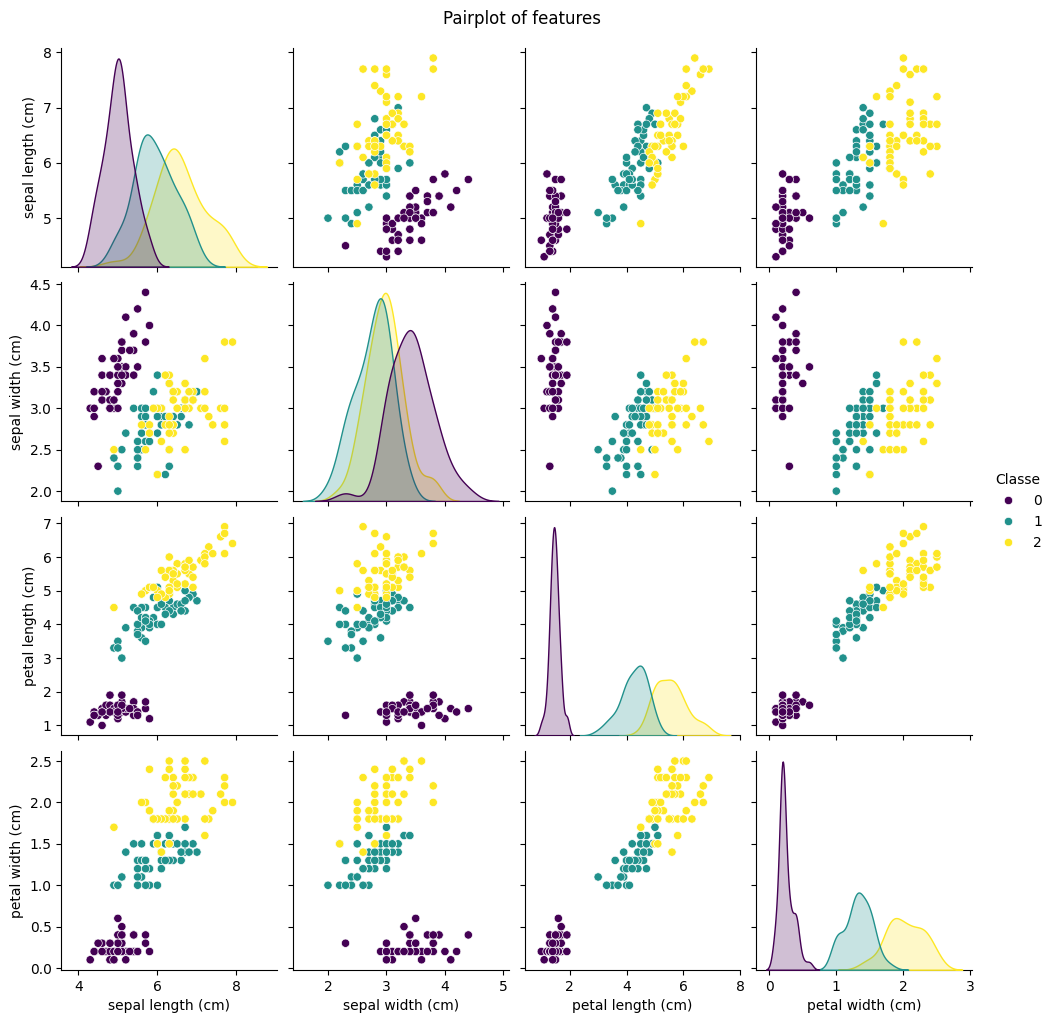

In [6]:

df['Classe'] = input_data.target

sns.pairplot(df, hue='Classe', palette='viridis')
plt.suptitle("Pairplot of features", y=1.02)
plt.show()


In [7]:
from pca_kmeans import PCAGuidedKMeans
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

pca_guided_kmeans = PCAGuidedKMeans(num_clusters=3)
X_reduced = pca_guided_kmeans.pca_dimension_reduction(X_normalized)
kmeans_reduced, H = pca_guided_kmeans.kmeans_with_r1_initialization(X_normalized)
initial_centroids = pca_guided_kmeans.compute_centroids(X_normalized, H)
kmeans_final = pca_guided_kmeans.kmeans_with_initial_centroids(X_normalized, initial_centroids)

print("Final centroids:", kmeans_final.cluster_centers_)
print("Final labels:", kmeans_final.labels_)
print("Distortion (PCA-guided K-means):", kmeans_final.inertia_)


Final centroids: [[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]
Final labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
Distortion (PCA-guided K-means): 139.8204963597498
